@author: [s16496@pjwstk.edu.pl](mailto:s16496@pjwstk.edu.pl)

Pobieram potrzebne mi biblioteki NumPy - do operacji na tablicach, Pandas - do analizy i czyszczenia danych, Sklearn - do machine learningu oraz plotly express, matplotlib i seaborn do wizualizacji

In [75]:
import plotly
plotly.__version__

'4.4.1'

In [76]:
import plotly.express as px

In [77]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.19.5
Pandas: 1.1.5


In [14]:
ls


drive/  sample_data/


Pobieram i wyświetlam dane

In [85]:
house_data = pd.read_csv('drive/MyDrive/housing.csv')
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Sprawdzam na wykresach jak rozkładają się dane

In [79]:
px.scatter_matrix(data_frame=house_data, dimensions=['median_house_value', 'housing_median_age','total_rooms', 'total_bedrooms'],
                  color='ocean_proximity', title='Scatter Matrix - houses')

Regresję liniową wyrażnie mogę zastosować przewidując ilość sypialni w stosunku do ilości pokoi

Wyciągam tylko potrzbne dane

In [86]:
house_data = house_data[['total_rooms', 'total_bedrooms']]
house_data

,total_rooms,total_bedrooms
0,880.0,129.0
1,7099.0,1106.0
2,1467.0,190.0
3,1274.0,235.0
4,1627.0,280.0
...,...,...
20635,1665.0,374.0
20636,697.0,150.0
20637,2254.0,485.0
20638,1860.0,409.0


Sprawdzam typ danych

In [81]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_rooms     20640 non-null  float64
 1   total_bedrooms  20433 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


Czyszcze dane i zmieniam typ na int

In [88]:
with pd.option_context('mode.use_inf_as_null', True):
   house_data = house_data.dropna()

In [89]:
house_data.astype('int32').dtypes

total_rooms       int32
total_bedrooms    int32
dtype: object

Dziele dane na treningowe i testowe

In [90]:
from sklearn.model_selection import train_test_split
house_data_test, house_data_train = train_test_split(house_data, test_size=1000)

In [92]:
house_data_train

,total_rooms,total_bedrooms
12456,3741.0,801.0
10905,851.0,297.0
4823,1809.0,640.0
13178,5622.0,861.0
1786,1334.0,366.0
...,...,...
2255,6101.0,1200.0
5713,2510.0,535.0
20246,2528.0,572.0
13344,1129.0,251.0


In [93]:
house_data_test

,total_rooms,total_bedrooms
1210,1566.0,325.0
18211,1236.0,290.0
17424,1051.0,235.0
10224,1492.0,439.0
4169,1684.0,316.0
...,...,...
16269,2001.0,428.0
12790,2680.0,502.0
2720,1715.0,337.0
3775,577.0,150.0


Przyglądam się prawidłowości rozkładu zbioru treningowego i testowego

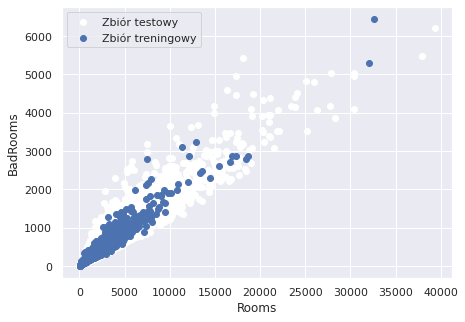

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

alpha = 0.5
plt.figure(figsize=(7, 5))
plt.scatter(house_data_test.total_rooms, house_data_test.total_bedrooms, c='w', label='Zbiór testowy')
plt.scatter(house_data_train.total_rooms, house_data_train.total_bedrooms, c='b', label='Zbiór treningowy')
plt.xlabel('Rooms')
plt.ylabel('BadRooms')
plt.legend()

Stosuje regresję liniową z biblioteki

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_data_train.total_rooms.values.reshape(-1, 1), house_data_train.total_bedrooms)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Oceniam jakość modelu

In [99]:
lin_reg.score(house_data_train.total_rooms.values.reshape(-1, 1), house_data_train.total_bedrooms)

0.908602128503452

Punktacja jest zadowalająca. Sprawdzam wizualnie dopasowanie modelu. Korzystam z coef(wartości wag) i intercept (wartość wyrazu wolnego) żeby wyrysować prostą regresji

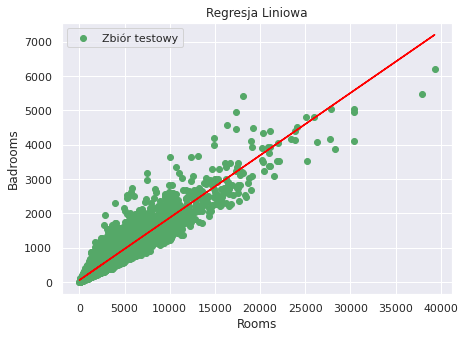

In [104]:
house_data_pred = lin_reg.predict(house_data_train.total_rooms.values.reshape(-1, 1))
plt.figure(figsize=(7, 5))
plt.title('Regresja Liniowa')
plt.scatter(house_data_test.total_rooms, house_data_test.total_bedrooms, c='g', label='Zbiór testowy')
plt.plot(house_data.total_rooms, lin_reg.intercept_ + lin_reg.coef_[0] * house_data.total_rooms, c='red')
plt.xlabel('Rooms')
plt.ylabel('Badrooms')
plt.legend()

Jakość modelu dla zbioru testowego

In [105]:
lin_reg.score(house_data_test.total_rooms.values.reshape(-1, 1), house_data_test.total_bedrooms)

0.8622387252130231